In [1]:
! pip install kaggle

In [2]:
! pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MVideo\.cache\kagglehub\datasets\ahmeduzaki\global-earthquake-tsunami-risk-assessment-dataset\versions\1


Предметная область: сейсмология
Источник данных: https://www.kaggle.com
Характер данных: реальные
Атрибуты:
magnitude(Float) - магнитуда землятресений
cdi(Integer) - интенсивность по шкале интенсивности сейсмических воздействий
mmi(Integer) - модифицированная шкала интенсивности Меркалли
sig(Integer) - оценка значимости события
nst(Integer) - количество мониторящих станций
dmin(Float) - расстояние до ближайшей сейсмической станции
gap(Float) - азимутальный зазор между станциями (в градусах)
depth(Float) - глубина очага землетрясения (км)
latitude(Float) - широта эпицентра (WGS84)
longitude(Float) - долгота эпицентра (WGS84)
Year(Integer) - год возникновения
Month(Integer) - месяц возникновения
tsunami(Binary) - потенциал цунами
Этот набор данных специально разработан для прогнозирования риска цунами, анализа землетрясений и оценки сейсмической опасности.

In [4]:
! pip install numpy
! pip install pandas
! pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from pandas.plotting import scatter_matrix

для каждого атрибута Cреднее значение и Cко

In [7]:
df = pd.read_csv(f"{path}/earthquake_data_tsunami.csv")
for attribute in df.columns:
    print("Среднее значение", attribute, "=", df[attribute].mean())

Среднее значение magnitude = 6.941125319693095
Среднее значение cdi = 4.333759590792839
Среднее значение mmi = 5.964194373401535
Среднее значение sig = 870.1086956521739
Среднее значение nst = 230.25063938618925
Среднее значение dmin = 1.3257570626598465
Среднее значение gap = 25.038989769820972
Среднее значение depth = 75.88319948849104
Среднее значение latitude = 3.5380998721227614
Среднее значение longitude = 52.609199360613815
Среднее значение Year = 2012.2800511508951
Среднее значение Month = 6.563938618925831
Среднее значение tsunami = 0.3887468030690537


In [8]:
for attribute in df.columns:
    print("СКО", attribute, "=", df[attribute].std())

СКО magnitude = 0.445514003048737
СКО cdi = 3.1699389773474027
СКО mmi = 1.4627239609667393
СКО sig = 322.46536655267835
СКО nst = 250.1881772572065
СКО dmin = 2.2188049569049353
СКО gap = 24.225066786738033
СКО depth = 137.2770781927863
СКО latitude = 27.30342917130246
СКО longitude = 117.89888599066005
СКО Year = 6.099439406447494
СКО Month = 3.5078662415449515
СКО tsunami = 0.48777759340049137


Гистограммы

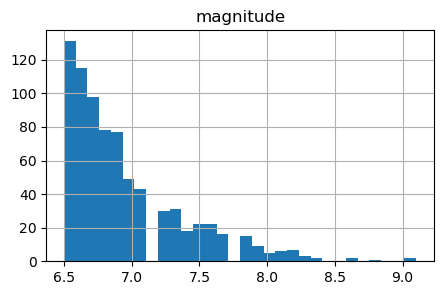

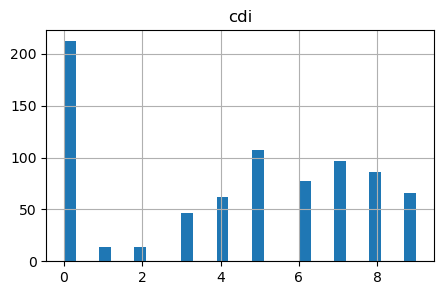

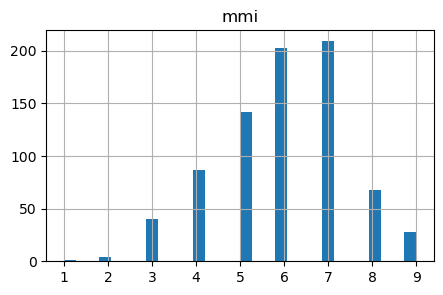

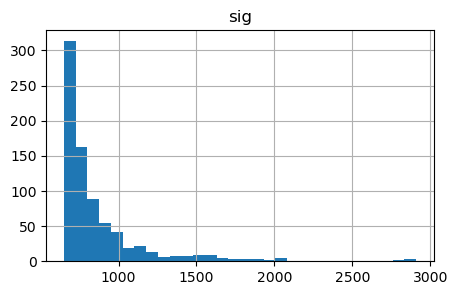

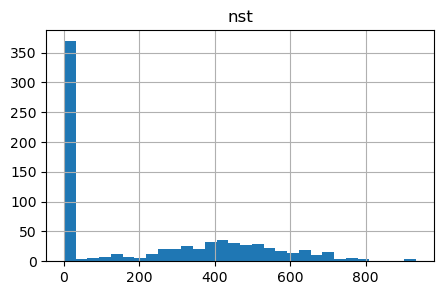

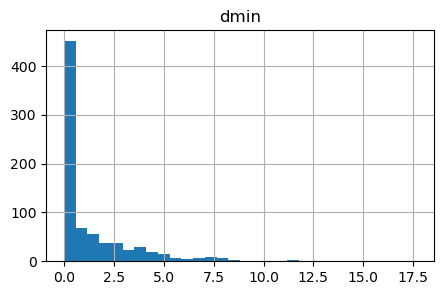

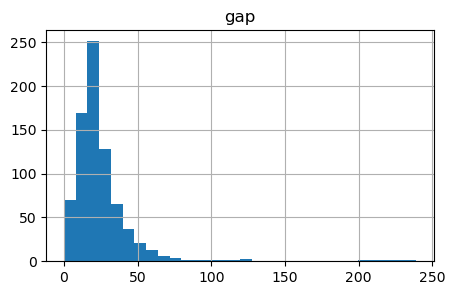

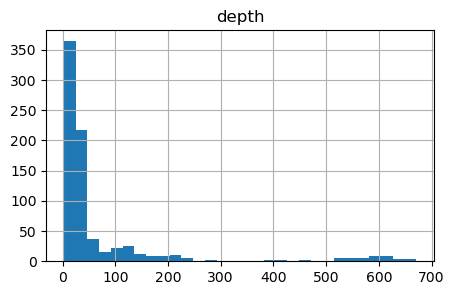

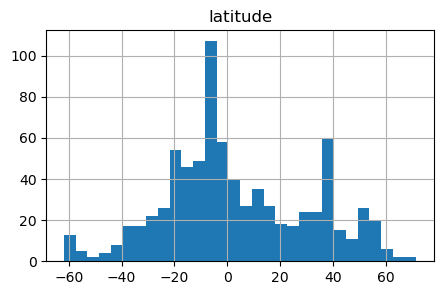

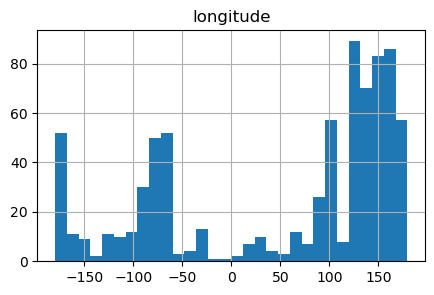

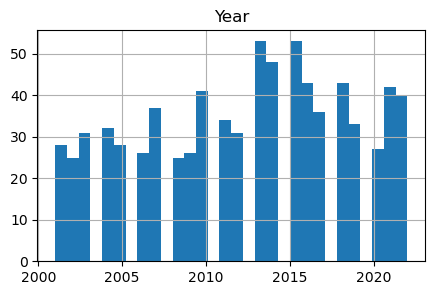

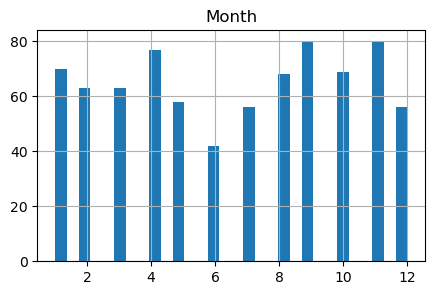

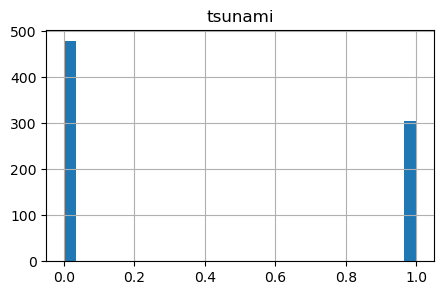

In [9]:
for attribute in df.columns:
    plt.figure(figsize=(5, 3))
    plt.hist(df[attribute], bins=30)
    plt.grid(True)
    plt.title(attribute)
    plt.show()

Выбросы можно наблюдать в графиках: magnitude, sig, nst, dmin, gap, depth

In [10]:
df.isna().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

Пропущенные значения не обнаружены

In [11]:
df.corr()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


In [12]:
num=0
corr=df.corr()
for col in corr.columns:
    for idx in corr.index:
        if col != idx and col>idx  and abs(corr.loc[idx, col]) > 0.7:
            if  corr.loc[idx, col]>0:
                print("У атрибутов", col, "и", idx, "высокая положительная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            else:
                print("У атрибутов", col, "и", idx, "высокая отрицательная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            num+=1
print("Всего найдено", num, "пар с высокой корреляцией")

Всего найдено 0 пар с высокой корреляцией


In [13]:
num=0
corr=df.corr()
for col in corr.columns:
    for idx in corr.index:
        if col != idx and col>idx  and 0.3 <= abs(corr.loc[idx, col]) < 0.7:
            if  corr.loc[idx, col]>0:
                print("У атрибутов", col, "и", idx, "умеренная положительная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            else:
                print("У атрибутов", col, "и", idx, "умеренная отрицательная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            num+=1
print("Всего найдено", num, "пар с умеренной корреляцией")

У атрибутов cdi и Year умеренная положительная корреляция, с коэффициентом корреляции: 0.42315809808434557
У атрибутов mmi и cdi умеренная положительная корреляция, с коэффициентом корреляции: 0.3179371442943882
У атрибутов mmi и depth умеренная отрицательная корреляция, с коэффициентом корреляции: -0.5044388041124981
У атрибутов sig и magnitude умеренная положительная корреляция, с коэффициентом корреляции: 0.5158707313598007
У атрибутов sig и cdi умеренная положительная корреляция, с коэффициентом корреляции: 0.4797882699405526
У атрибутов sig и mmi умеренная положительная корреляция, с коэффициентом корреляции: 0.44242325073979233
У атрибутов nst и dmin умеренная отрицательная корреляция, с коэффициентом корреляции: -0.5293712583906837
У атрибутов nst и Year умеренная отрицательная корреляция, с коэффициентом корреляции: -0.6886018261616113
У атрибутов dmin и Year умеренная положительная корреляция, с коэффициентом корреляции: 0.5294490123799642
У атрибутов longitude и gap умеренная

In [14]:
num=0
corr=df.corr()
for col in corr.columns:
    for idx in corr.index:
        if col != idx and col>idx and abs(corr.loc[idx, col]) < 0.3:
            if  corr.loc[idx, col]>0:
                print("У атрибутов", col, "и", idx, "слабая положительная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            else:
                print("У атрибутов", col, "и", idx, "слабая отрицательная корреляция, с коэффициентом корреляции:", corr.loc[idx, col])
            num+=1
print("Всего найдено", num, "пар с слабой корреляцией")

У атрибутов magnitude и cdi слабая положительная корреляция, с коэффициентом корреляции: 0.20954922368359624
У атрибутов magnitude и dmin слабая отрицательная корреляция, с коэффициентом корреляции: -0.0914025016617093
У атрибутов magnitude и gap слабая отрицательная корреляция, с коэффициентом корреляции: -0.1106260615000277
У атрибутов magnitude и depth слабая положительная корреляция, с коэффициентом корреляции: 0.030644410229721235
У атрибутов magnitude и latitude слабая отрицательная корреляция, с коэффициентом корреляции: -0.008551563436749123
У атрибутов magnitude и longitude слабая отрицательная корреляция, с коэффициентом корреляции: -0.013910952767835667
У атрибутов magnitude и Year слабая отрицательная корреляция, с коэффициентом корреляции: -0.057083206482915844
У атрибутов magnitude и Month слабая отрицательная корреляция, с коэффициентом корреляции: -0.011925993409023427
У атрибутов cdi и Month слабая положительная корреляция, с коэффициентом корреляции: 0.007002360605917

Тут можно увидеть, что у большинства пар атрибутов слабая корреляция, у 13 пар умеренная, и ни у одной пары нет высокой корреляции. Встречаются как положительные корреляции (коэффициент корелляции больше 0), так и отрицательные (коэффициент меньше 0).

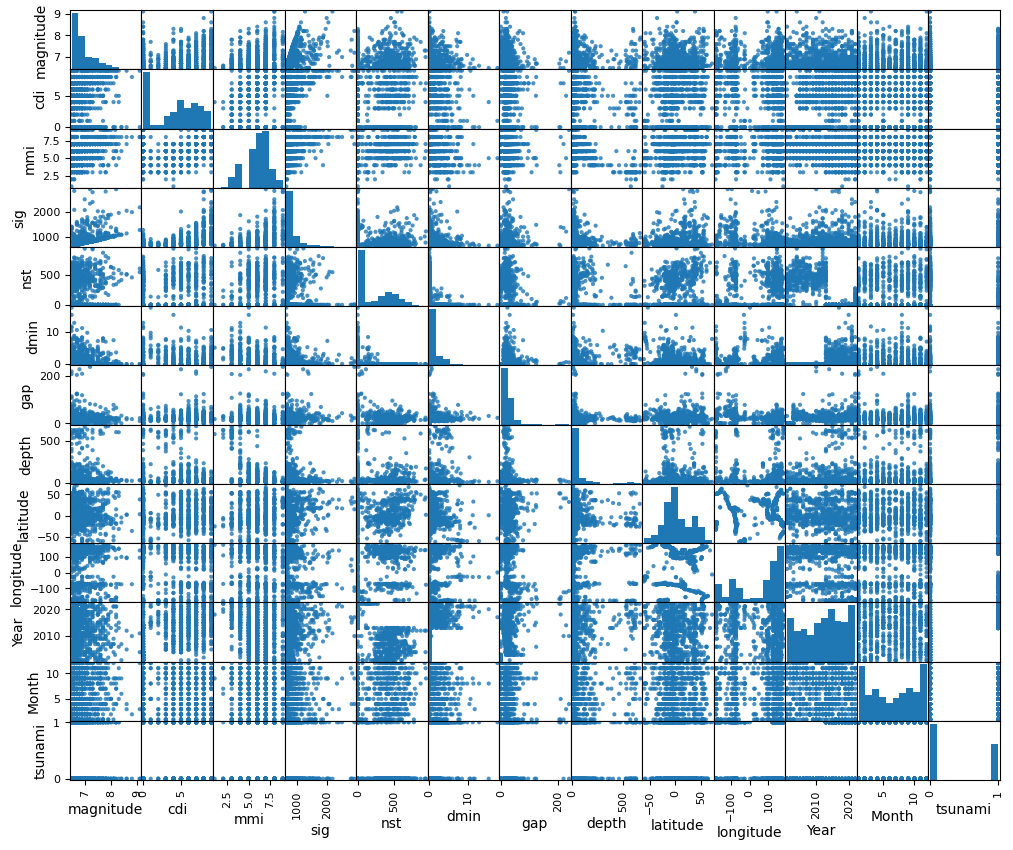

In [15]:
scatter_matrix(df[df.columns], alpha=0.8, figsize=(12, 10), diagonal="hist")
plt.show()

Графики рассеивания также показывают, что у пар атрибутов нет сильных корреляций, а в большенстве графиков можно заметить лишь будто случайный набор точек, что указывает на слабую корреляцию или её отсутствие